In [74]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [75]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Laplacian.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-75-f19bd88834a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-75-f19bd88834a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


0         1         2         3         4         5         6  \
0  1.116591  1.076268  0.964579  0.827250  0.788555  0.717183  0.685219   
1  1.132044  0.942004  0.847378  0.815218  0.794283  0.796818  0.762221   
2  1.761399  1.634343  1.543578  1.592710  1.612295  1.548785  1.550124   
3  0.895756  0.938467  1.064396  1.181068  0.988052  1.038185  1.114712   
4  1.525381  1.297543  1.112897  0.990920  1.217607  1.347222  1.202654   

          7         8         9  ...        19        20        21        22  \
0  0.675476  0.645822  0.640040  ...  0.919854  0.953868  1.010380  1.181967   
1  0.724707  0.812962  0.837894  ...  1.092682  0.993216  0.867587  1.031902   
2  1.568618  1.546401  1.628864  ...  1.616676  1.602723  1.652010  1.772399   
3  1.003453  1.014447  1.150527  ...  0.015918  0.015918  0.015918  0.007598   
4  1.422620  1.429657  1.367186  ...  1.724537  1.517537  1.476781  1.776136   

         23        24        25        26        27  Class  
0  1.053482  0.782155  0.685755  0.771562  0.917780      1  
1  1.237058  0.976347  0.881224  0.850401  0.844549      1  
2  1.760665  1.647880  1.614305  1.567624  1.636149      1  
3  0.118888  0.080963  0.019146  0.021540  0.021865      1  
4  1.122659  1.110401  1.508056  1.094994  0.963698      1  

[5 rows x 29 columns]

In [76]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=MinMaxScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

In [77]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8809523809523809
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       142
           1       0.62      0.62      0.62        26

    accuracy                           0.88       168
   macro avg       0.77      0.77      0.77       168
weighted avg       0.88      0.88      0.88       168



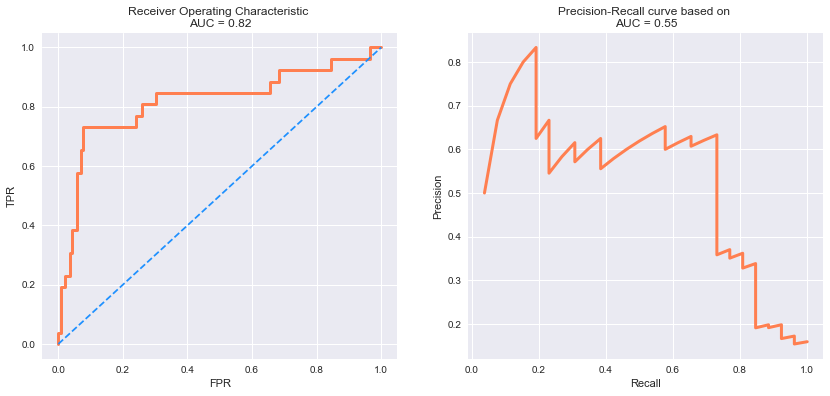

In [78]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()